### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight):

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [9]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,roc_auc_score,roc_curve,plot_roc_curve

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import make_column_transformer

from scipy.stats import zscore
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler,PowerTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings("ignore")

In [10]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


showing the datset.

In [11]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Here we can see there are no null values prsents in any column.

In [12]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

age: continuous variable.
    
workclass: categorical datatype-different categories of work of them is it private,government,etc.
    
fnlwgt: <b>final weight</b> In other words, this is the number of people the census believes the entry represents.
    
education: Highest Education level.
    
education-num: no. of education he educated.
    
marital-status: categorical defining persons marital-status.
    
occupation: categorical data he person what work he does for his income.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried theses are relation values of the person.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black The Census Bureau collects race data according to U.S. Office of Management and Budget guidelines, and these data are based on self-identification.

sex: Female, Male.

capital-gain: the profits from the sale of stocks, bonds, and other assets.

capital-loss:  The net losses incurred during the reference period from the sale of capital property.

hours-per-week: work done by hours in a week.

native-country: persons belongs from


In [13]:
df.shape

(32560, 15)

we have 32560 no. of records, 14 features & 1 label.

In [14]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [15]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

the ? shows there are 1836 no. of records that are unknown.

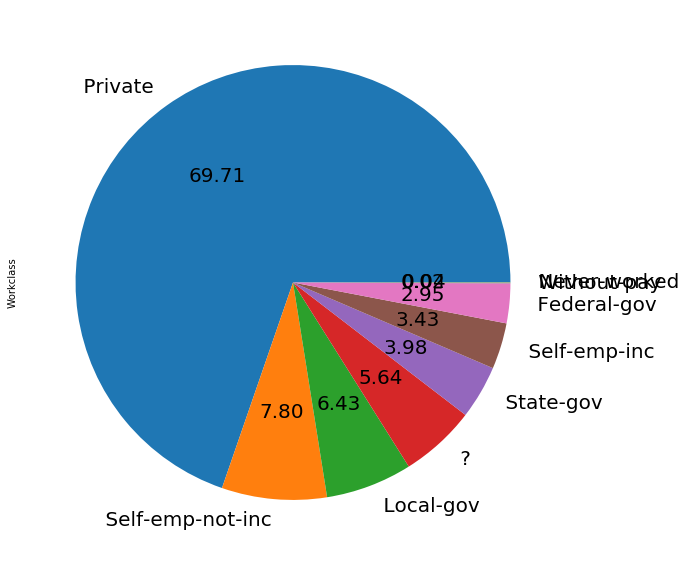

In [16]:
df['Workclass'].value_counts().plot.pie(subplots=True,figsize=(10,10),autopct='%0.2f',fontsize=20)
plt.show()

69.71% of gata is only private work class that mean person are intrested to do their private work for their Income.

In [17]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

there we can see that ? that means thre 1843 null values in native-country.

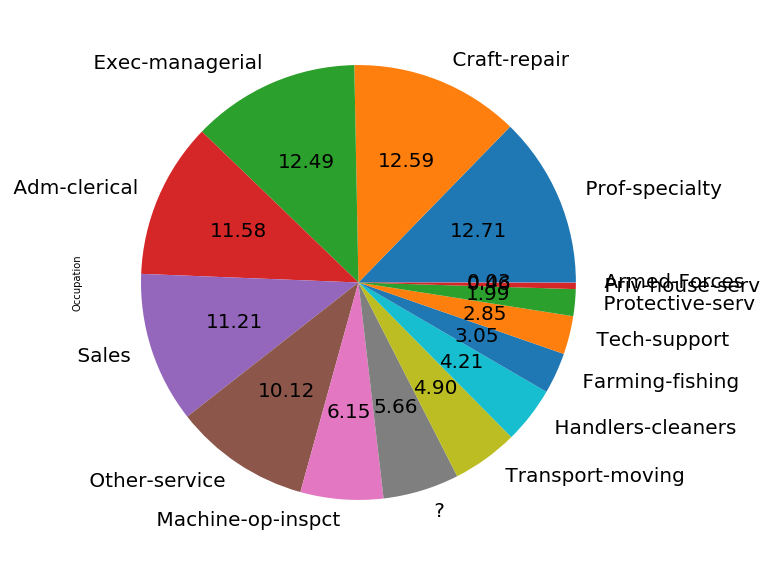

In [18]:
df["Occupation"].value_counts().plot.pie(subplots=True,figsize=(10,10),autopct='%0.2f',fontsize=20)
plt.show()

All class of occupation are balanced

In [19]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

sex column has 21789 no. of male records and 10771 no. of female records

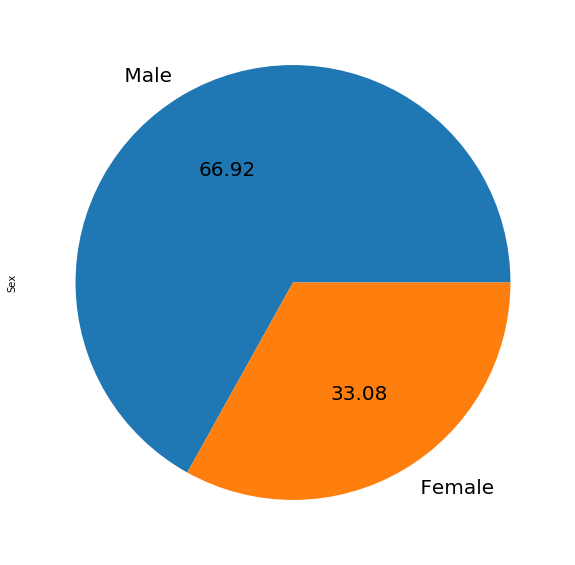

In [20]:
df["Sex"].value_counts().plot.pie(subplots=True,figsize=(10,10),autopct='%0.2f',fontsize=20)
plt.show()

male class of person are having 67% of records in datset.

In [21]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

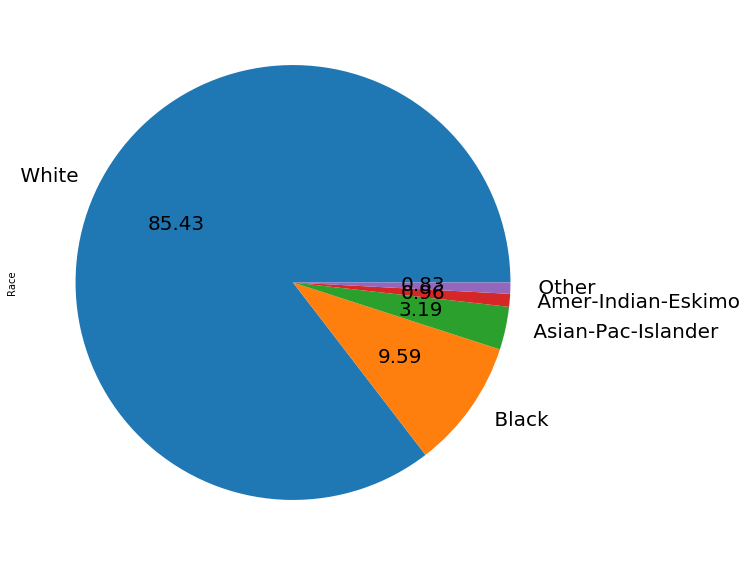

In [22]:
df["Race"].value_counts().plot.pie(subplots=True,figsize=(10,10),autopct='%0.2f',fontsize=20)
plt.show()

white class Race person are highly in our datset.

In [23]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

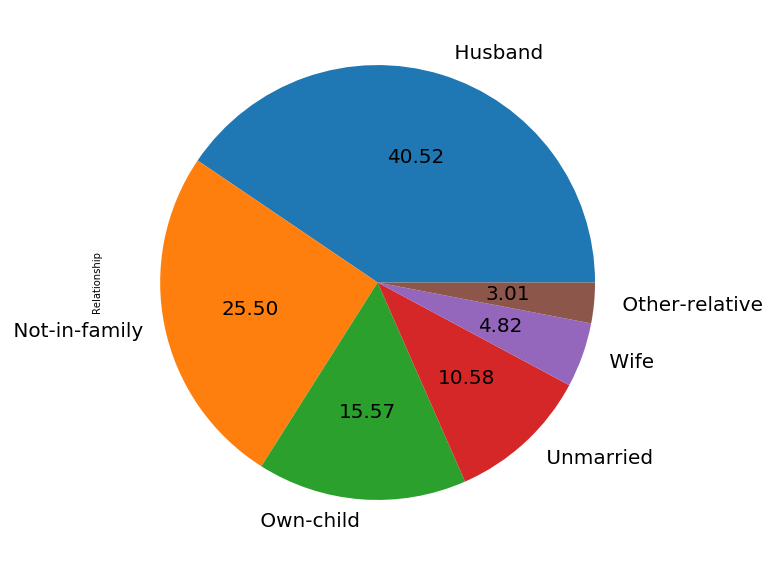

In [24]:
df["Relationship"].value_counts().plot.pie(subplots=True,figsize=(10,10),autopct='%0.2f',fontsize=20)
plt.show()

its seems to be balanced. But their are Husband type relationship person are high in dataset.

In [25]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

here we have ? that means 1843 no. of unknown records.

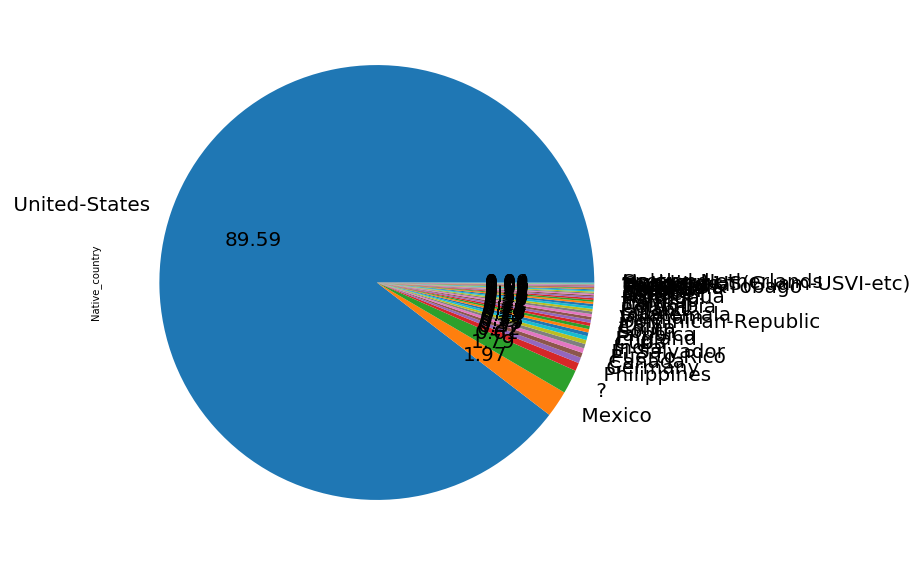

In [26]:
df["Native_country"].value_counts().plot.pie(subplots=True,figsize=(10,10),autopct='%0.2f',fontsize=20)
plt.show()

89.5% of record for US country citizens

In [27]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

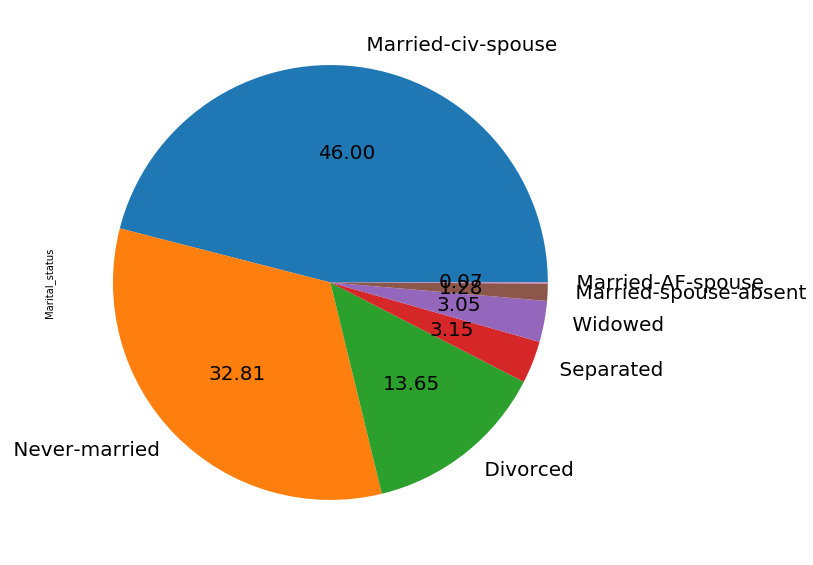

In [28]:
df["Marital_status"].value_counts().plot.pie(subplots=True,figsize=(10,10),autopct='%0.2f',fontsize=20)
plt.show()

Seems to be balanced where Married persons are 46% in our data.

In [29]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

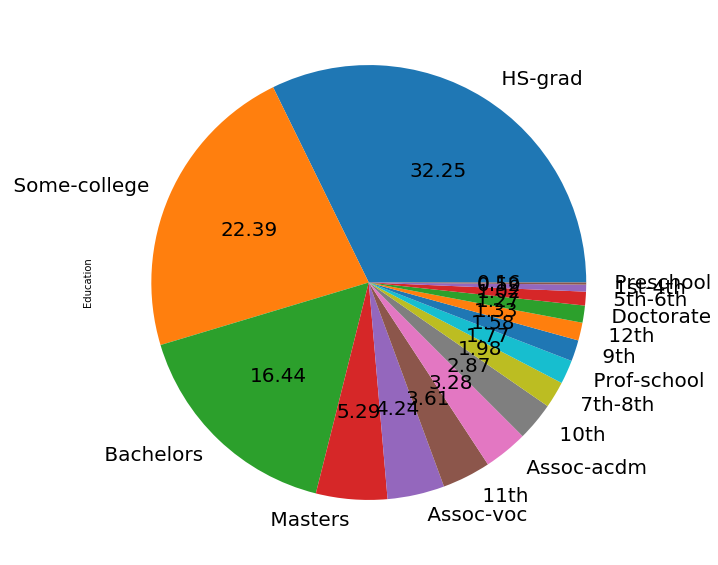

In [30]:
df["Education"].value_counts().plot.pie(subplots=True,figsize=(10,10),autopct='%0.2f',fontsize=20)
plt.show()

person done their max education HS-grad are 32.75%.

In [31]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [32]:
categorical_dtye=['Workclass', 'Education', 'Education_num','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country','Income']
numrical_dtype=['Age','Fnlwgt','Capital_gain',"Capital_loss","Hours_per_week"]

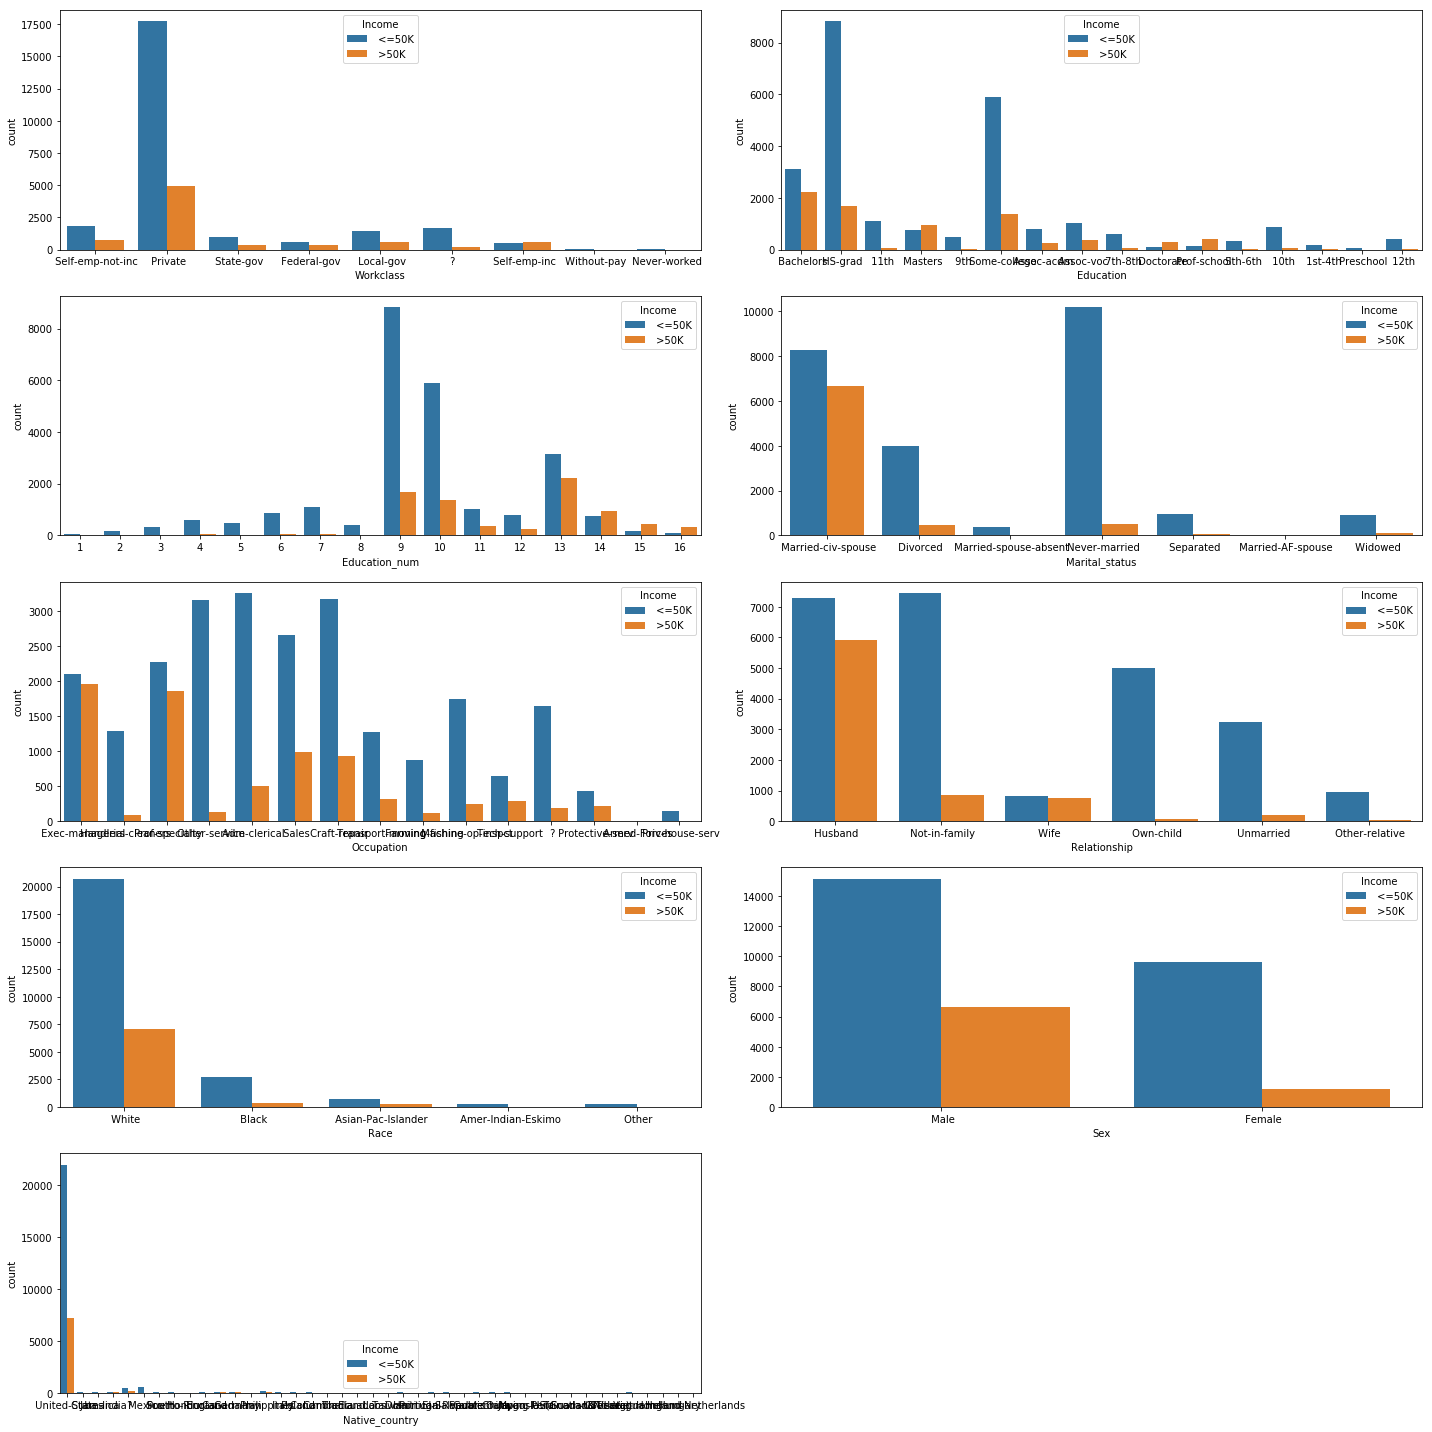

In [33]:
plt.figure(figsize=(20,20))
plot=1
for col in categorical_dtye:
    if plot<=9:
        ax=plt.subplot(5,2,plot)
        sns.countplot(df[col],hue=df['Income'])
    plot+=1
plt.tight_layout()

Graph1:: represent that the person whose worl-class is private their monthly income less then 50K & the person who got no pay or never worked they always has less 50k income.

Graph2:: Higher the education-Level higher you have income or greter than 50k.

Graph3:: the education_num les than 11 has high chance that their income should be less than 50k.

Graph4:: Married cv-spouse has 50% chance of getting greater then 50k or not while others.

Graph5::  Exec-managerial  has 50% chance of getting greater then 50k or not while others.

Graph 6:: Husband relationship type has 50% chance of getting greater then 50k or not while others.

Graph7:: white type of race person has high chance that they have 50k+ income. while others.

Graph9:: Male are getting 50k+ income than to female.

Graph 10:: u.S native country has 25% chances of getting 50K+ income.

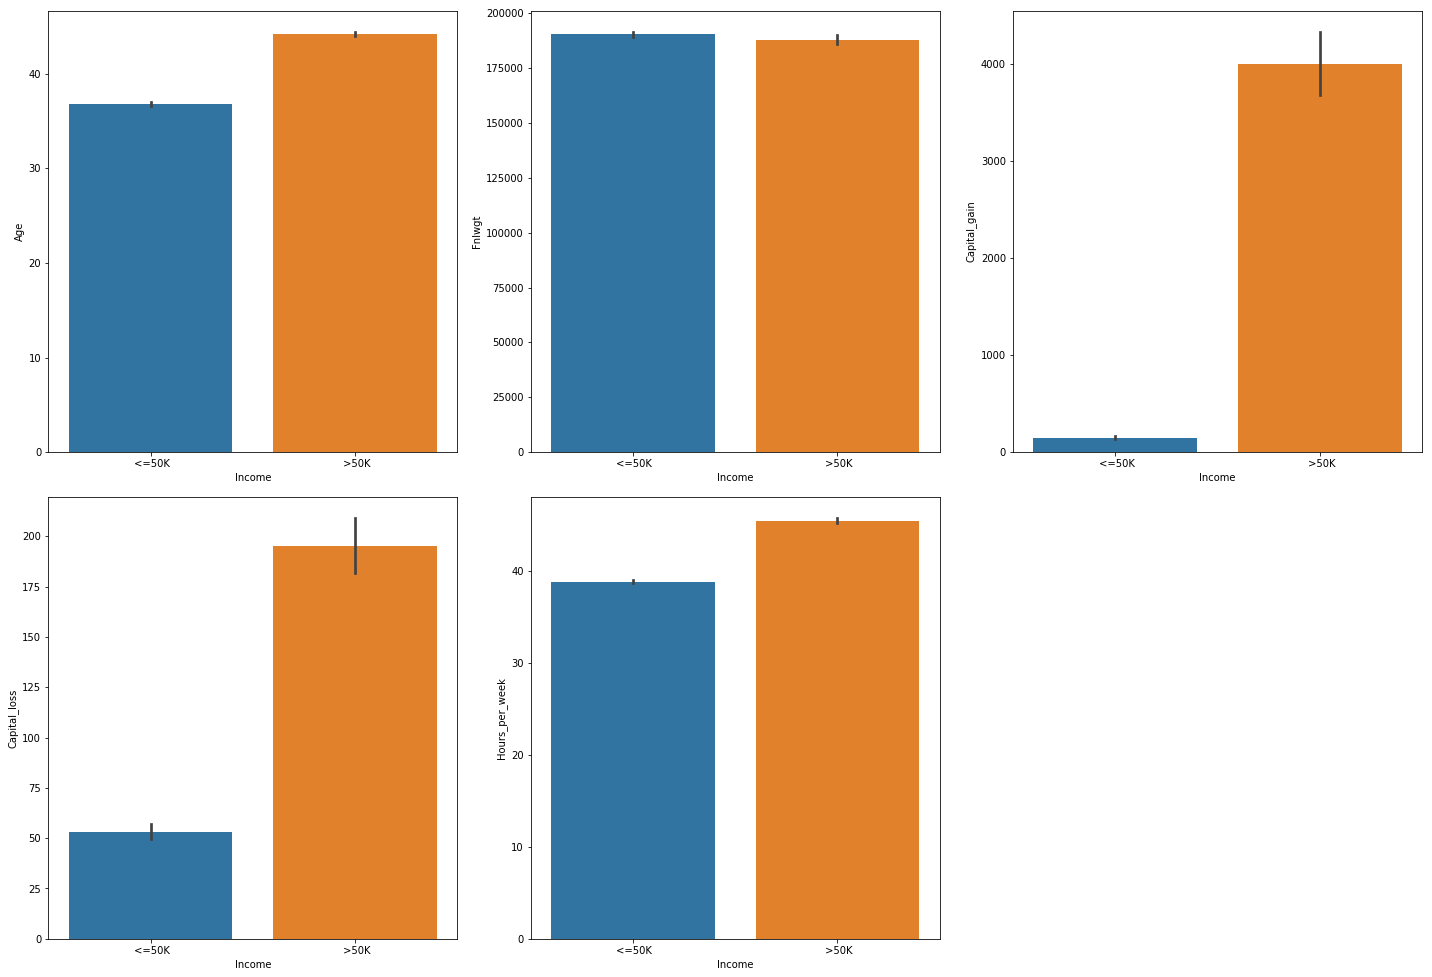

In [34]:
plt.figure(figsize=(20,20))
plot=1
for col in numrical_dtype:
    if plot<=9:
        ax=plt.subplot(3,3,plot)
        sns.barplot(df['Income'],df[col])
    plot+=1
plt.tight_layout()

person age > 36 are getting 50K+ income.

final_weight doesnot depnd whther the perget the 50K+ or not.

person getting more 250  seems to be has high chance of getting 50K+

person capitive-loss greater than 50 has high chance of getting income 50k+

person works for 40+ hours a week has more chance of 50k+ income.

In [35]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [36]:
encoder=LabelEncoder()
df['Workclass']=encoder.fit_transform(df['Workclass'])
df['Education']=encoder.fit_transform(df['Education'])
df['Marital_status']=encoder.fit_transform(df['Marital_status'])
df['Occupation']=encoder.fit_transform(df['Occupation'])
df['Relationship']=encoder.fit_transform(df['Relationship'])
df['Race']=encoder.fit_transform(df['Race'])
df['Sex']=encoder.fit_transform(df['Sex'])
df['Native_country']=encoder.fit_transform(df['Native_country'])
df['Income']=encoder.fit_transform(df['Income'])

In [37]:
df['Workclass'].value_counts()

4    22696
6     2541
2     2093
0     1836
7     1297
5     1116
1      960
8       14
3        7
Name: Workclass, dtype: int64

here ? is replaced by 0 that are null values. i replace it by 4 that is by Private work-class.

In [38]:
df["Workclass"]=df.Workclass.replace(0,4)

In [39]:
df['Workclass'].value_counts()

4    24532
6     2541
2     2093
7     1297
5     1116
1      960
8       14
3        7
Name: Workclass, dtype: int64

In [40]:
df['Native_country'].value_counts()

39    29169
26      643
0       583
30      198
11      137
2       121
33      114
8       106
19      100
5        95
9        90
23       81
35       80
3        75
22       73
6        70
40       67
13       64
24       62
31       60
4        59
36       51
14       44
20       43
32       37
27       34
29       31
12       29
10       29
7        28
21       24
17       20
1        19
38       19
37       18
25       18
41       16
28       14
18       13
16       13
34       12
15        1
Name: Native_country, dtype: int64

here ? is replaced by 0 that are null values. i replace it by 39 that is by US country.

In [41]:
df["Native_country"]=df.Native_country.replace(0,39)

In [42]:
df['Native_country'].value_counts()

39    29752
26      643
30      198
11      137
2       121
33      114
8       106
19      100
5        95
9        90
23       81
35       80
3        75
22       73
6        70
40       67
13       64
24       62
31       60
4        59
36       51
14       44
20       43
32       37
27       34
29       31
10       29
12       29
7        28
21       24
17       20
38       19
1        19
37       18
25       18
41       16
28       14
18       13
16       13
34       12
15        1
Name: Native_country, dtype: int64

In [43]:
df.Occupation.value_counts()

10    4140
3     4099
4     4066
1     3769
12    3650
8     3295
7     2002
0     1843
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: Occupation, dtype: int64

here ? is replaced by 0 that are null values. i replace it by 10 that is by Prof-Speciality occupation.

In [44]:
df["Occupation"]=df.Occupation.replace(0,10)

In [45]:
df.Occupation.value_counts()

10    5983
3     4099
4     4066
1     3769
12    3650
8     3295
7     2002
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: Occupation, dtype: int64

In [46]:
df.Race.value_counts()

4    27815
2     3124
1     1039
0      311
3      271
Name: Race, dtype: int64

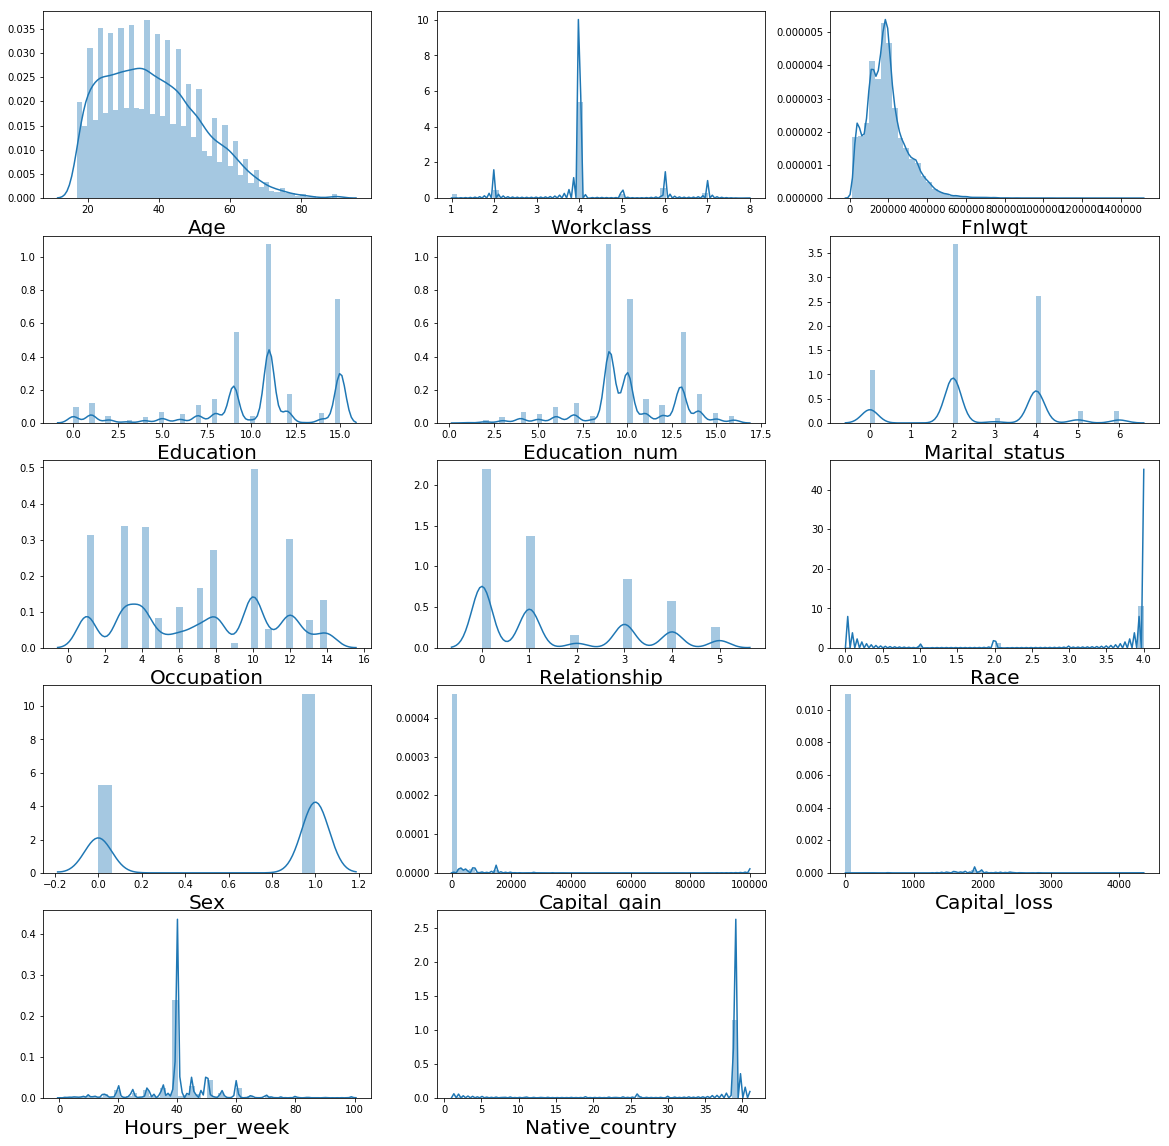

In [47]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in df:
    if plotno<=14:
        ax=plt.subplot(5,3,plotno)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

Age,Education_num,Marital_status,Occupation,Hours_per_week seems to be normally distributed.

In [48]:
df.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
Income             1.212383
dtype: float64

Age,Fnlwgt,Education,Relationship,Race,Sex,Capital_gain,Capital_Loss,Native_country has highly skewed data

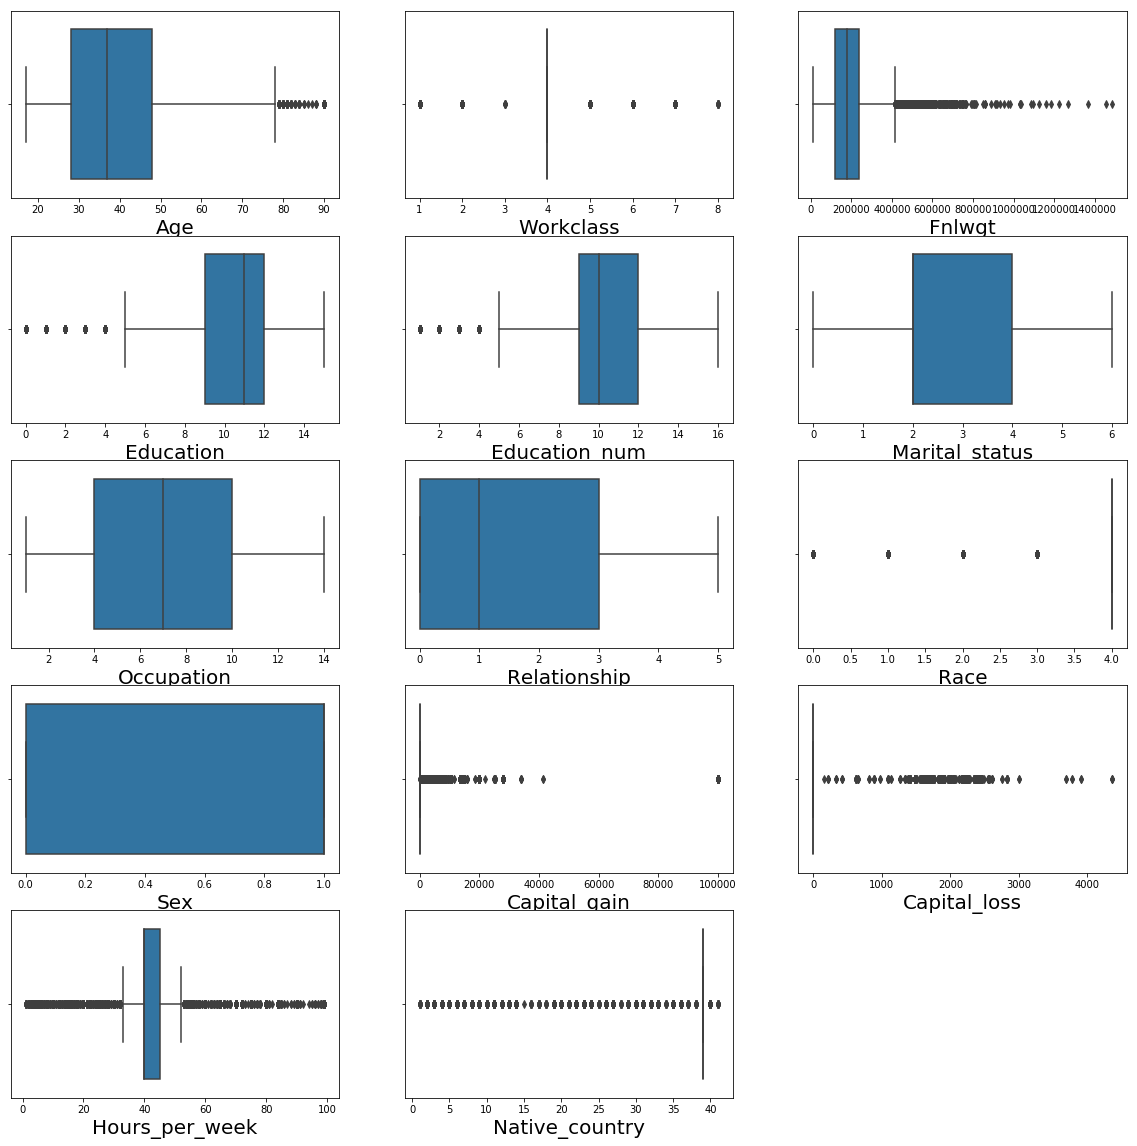

In [49]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in df:
    if plotno<=14:
        ax=plt.subplot(5,3,plotno)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

work-class, final_weight,education, education_num,Race,Capital_gain,Capital_loss,Hours_per_week and Native_country these are the features that seems there are outliers in our dataset.

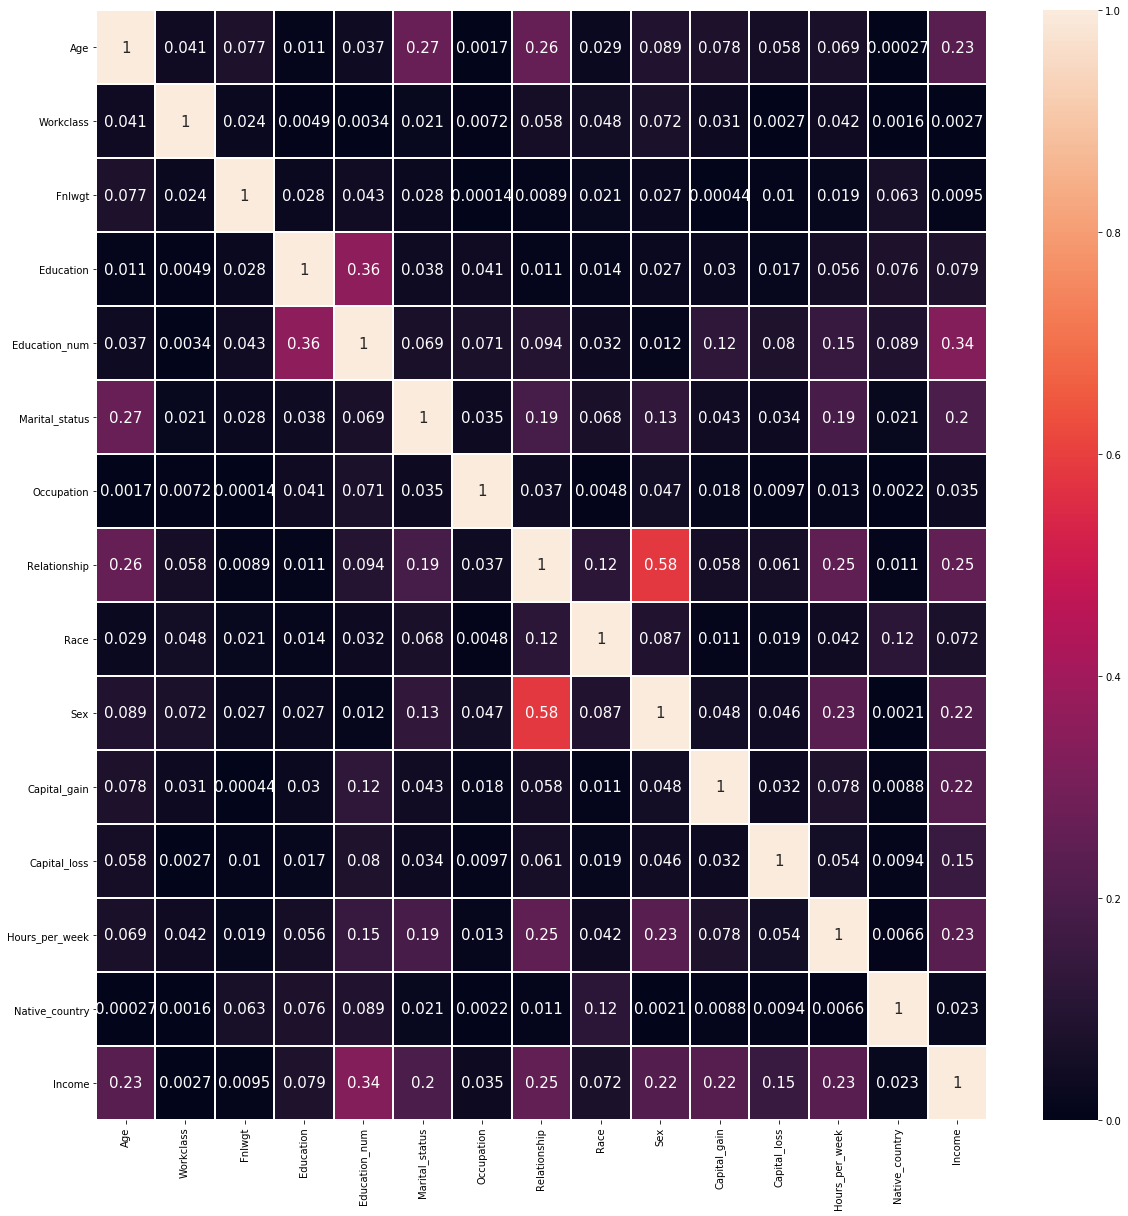

In [50]:
plt.figure(figsize=(17,17))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.tight_layout()

Native-Country and Occupation are least dependent to predict Income.

Among features there is no multi-colinearity exists.

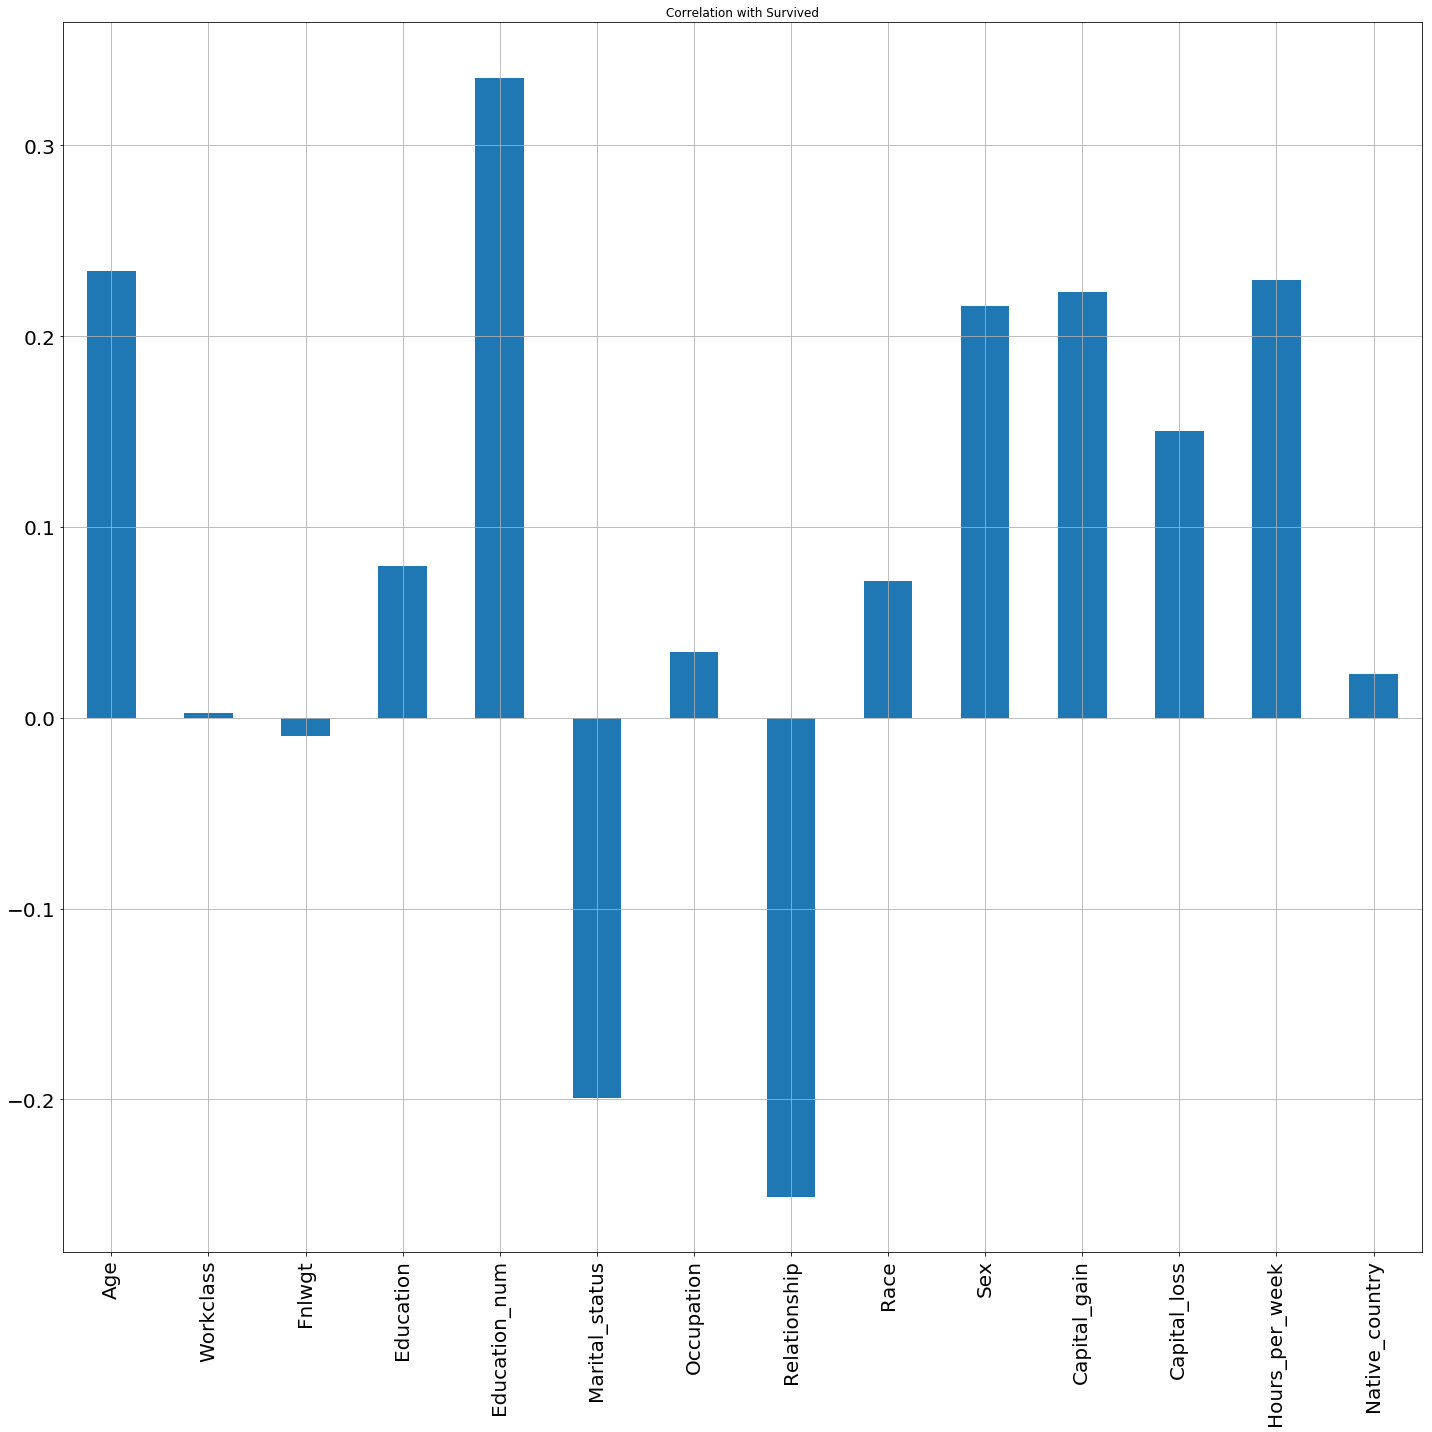

In [51]:
df.drop("Income",axis=1).corrwith(df.Income).plot(kind='bar',grid=True,figsize=(20,20),title='Correlation with Survived',fontsize=20)
plt.tight_layout()

Showing the positive and negative reltion of features ans label variables.

In [52]:
df.shape

(32560, 15)

## Data Cleaning

In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df.shape

(32536, 15)

14 no. od duplicates record are there we droopred them.

In [55]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32536.000000,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,4.094357,1.897843e+05,10.297547,10.081725,2.611384,7.139476,1.446552,3.665816,0.669228,1078.410069,87.370912,40.440343,37.419136,0.240933
std,13.638193,1.107449,1.055563e+05,3.870195,2.571622,1.506304,3.973089,1.607087,0.848858,0.470498,7388.068465,403.107737,12.347079,6.053903,0.427656
min,17.000000,1.000000,1.228500e+04,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.369932e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


If person capital_gain is 99999 its to me inaccurate. in our data and the columns has std> mean there standard in this column.
 
 same with column Capital_loss whose std>mean.
 
if a person works for onle 1 hour a week he never would get 50k+ income.


### Removing Outliers

In [56]:
zscore=zscore(df[['Capital_gain','Capital_loss','Hours_per_week' ]])
abs_Zscore=np.abs(zscore)
filtered=(abs_Zscore<3).all(axis=1)
df=df[filtered]

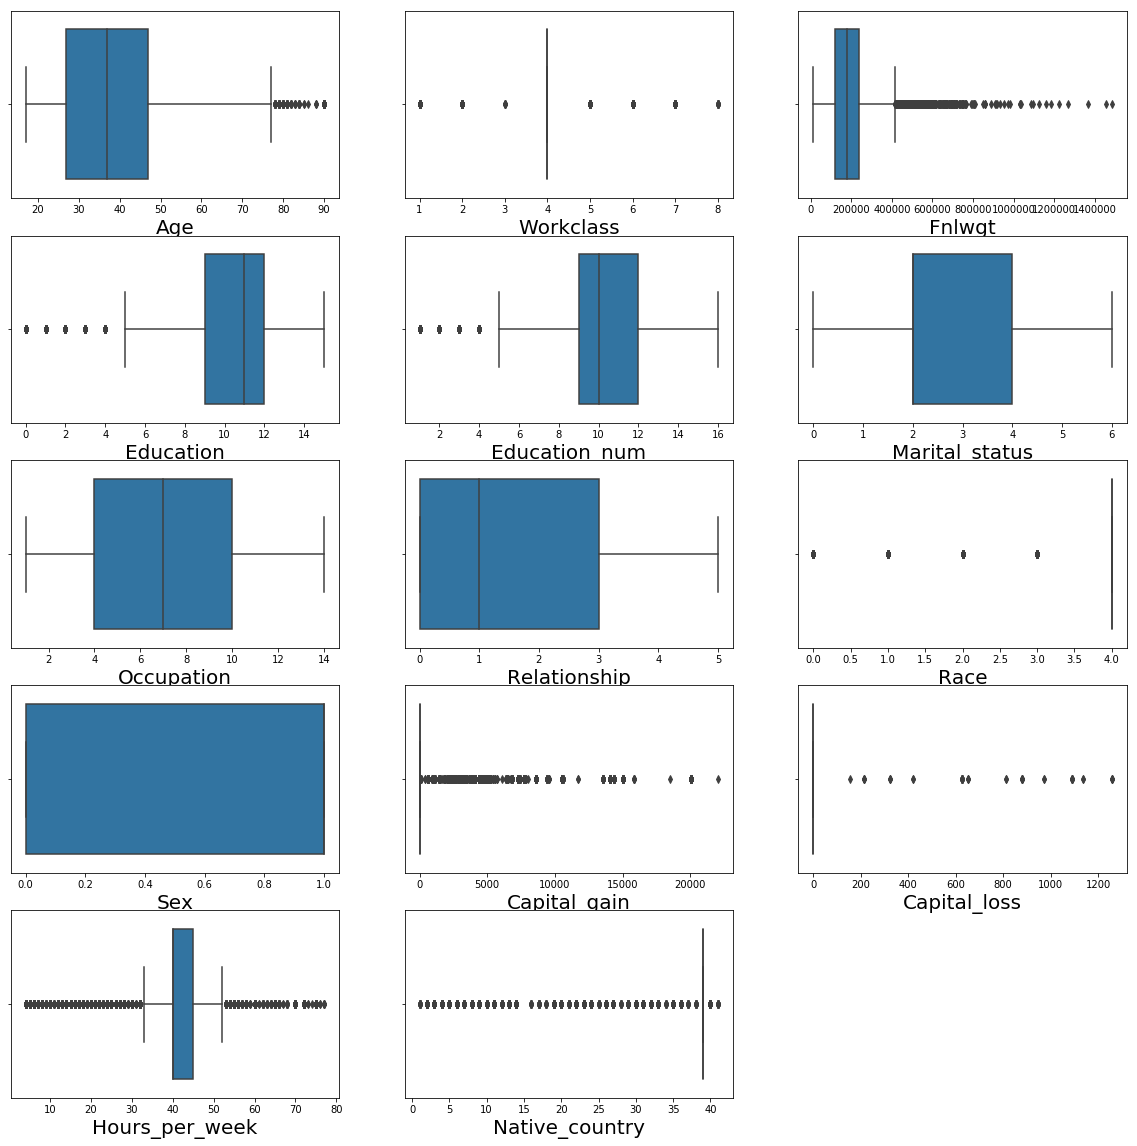

In [57]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in df:
    if plotno<=14:
        ax=plt.subplot(5,3,plotno)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

In [58]:
df.shape

(30439, 15)

In [59]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,30439.000000,30439.000000,3.043900e+04,30439.000000,30439.000000,30439.00000,30439.000000,30439.000000,30439.000000,30439.000000,30439.000000,30439.000000,30439.000000,30439.000000,30439.000000
mean,38.322185,4.085482,1.901989e+05,10.276093,10.016788,2.62778,7.110516,1.477775,3.661454,0.661618,569.504287,1.185091,39.843096,37.395184,0.221558
std,13.625820,1.101397,1.059167e+05,3.900058,2.542745,1.51711,3.979629,1.608636,0.852756,0.473167,2332.844633,32.382015,11.167451,6.086265,0.415302
min,17.000000,1.000000,1.228500e+04,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000
25%,27.000000,4.000000,1.179610e+05,9.000000,9.000000,2.00000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.787800e+05,11.000000,10.000000,2.00000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,47.000000,4.000000,2.374605e+05,12.000000,12.000000,4.00000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.00000,14.000000,5.000000,4.000000,1.000000,22040.000000,1258.000000,77.000000,41.000000,1.000000


now its seems to be some more accurate data then previous.

### Using Power Transformer. so, that data is less skewed

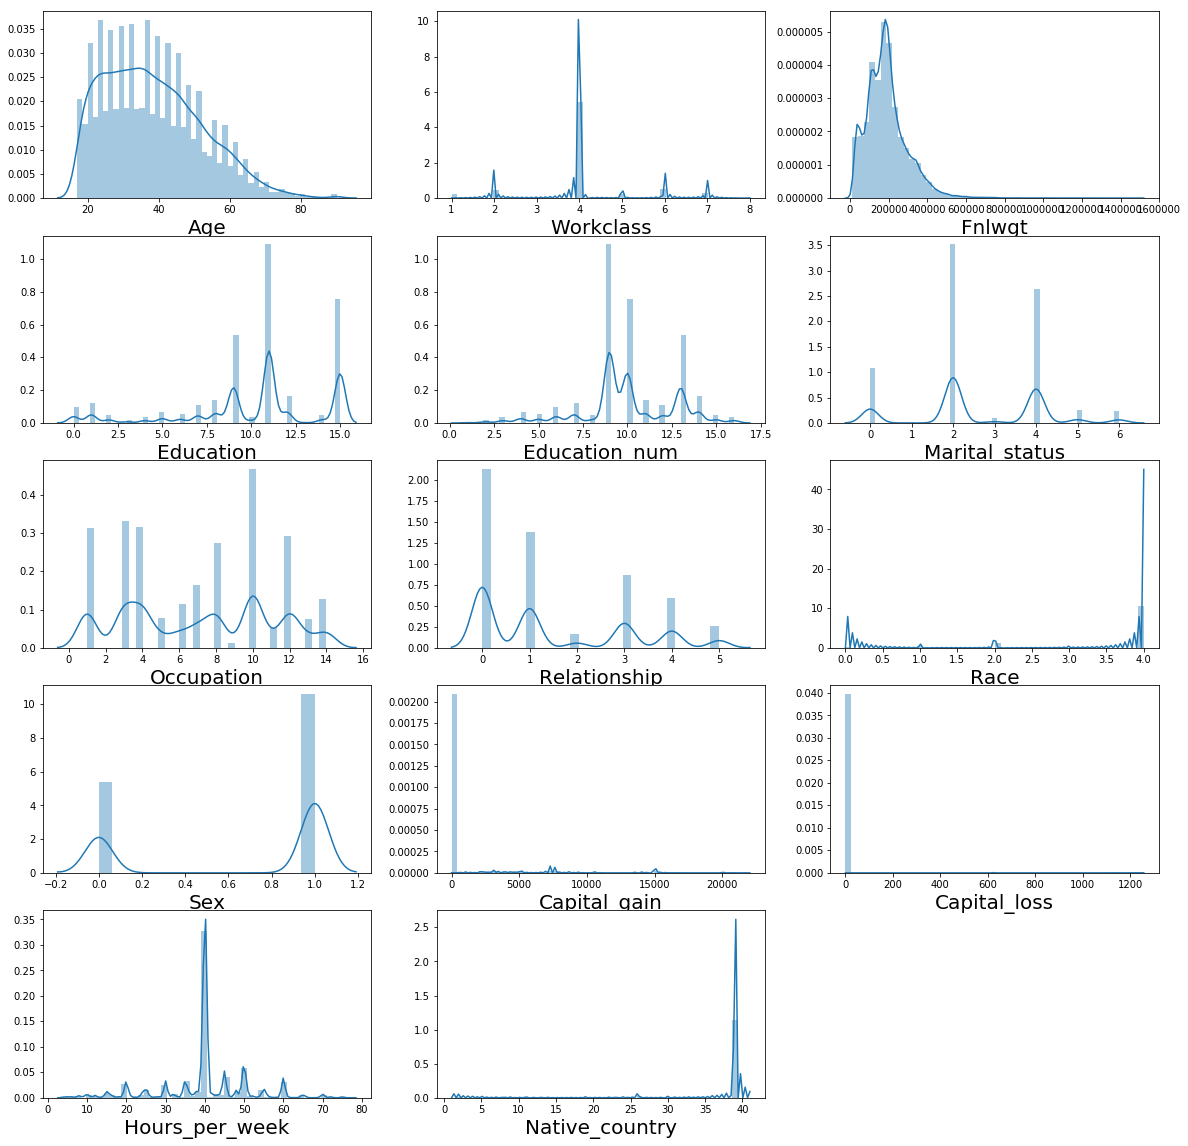

In [60]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in df:
    if plotno<=14:
        ax=plt.subplot(5,3,plotno)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

In [61]:
df.skew()

Age                0.570739
Workclass          0.091972
Fnlwgt             1.472827
Education         -0.925736
Education_num     -0.327387
Marital_status    -0.042537
Occupation         0.006472
Relationship       0.746339
Race              -2.412829
Sex               -0.683179
Capital_gain       4.955435
Capital_loss      29.964982
Hours_per_week    -0.355424
Native_country    -4.205720
Income             1.341003
dtype: float64

In [62]:
features=['Age','Fnlwgt','Education','Relationship','Race','Sex','Capital_gain','Capital_loss','Native_country']
scalar=PowerTransformer(method='yeo-johnson')
df[features]=scalar.fit_transform(df[features].values)
df[features].head()

,Age,Fnlwgt,Education,Relationship,Race,Sex,Capital_gain,Capital_loss,Native_country
0,0.910469,-1.093168,-0.467680,-1.112593,0.416532,0.715154,-0.296518,-0.039742,0.296443
1,0.126715,0.395309,0.095783,0.095349,0.416532,0.715154,-0.296518,-0.039742,0.296443
2,1.081018,0.558852,-2.054995,-1.112593,-2.410885,0.715154,-0.296518,-0.039742,0.296443
3,-0.707725,1.334967,-0.467680,1.548678,-2.410885,-1.398300,-0.296518,-0.039742,-3.372732
4,0.052265,0.952715,0.397942,1.548678,0.416532,-1.398300,-0.296518,-0.039742,0.296443


In [63]:
df.skew()

Age               -0.011997
Workclass          0.091972
Fnlwgt             0.018222
Education         -0.315320
Education_num     -0.327387
Marital_status    -0.042537
Occupation         0.006472
Relationship       0.104842
Race              -1.986126
Sex               -0.683179
Capital_gain       3.076107
Capital_loss      25.123886
Hours_per_week    -0.355424
Native_country    -2.938976
Income             1.341003
dtype: float64

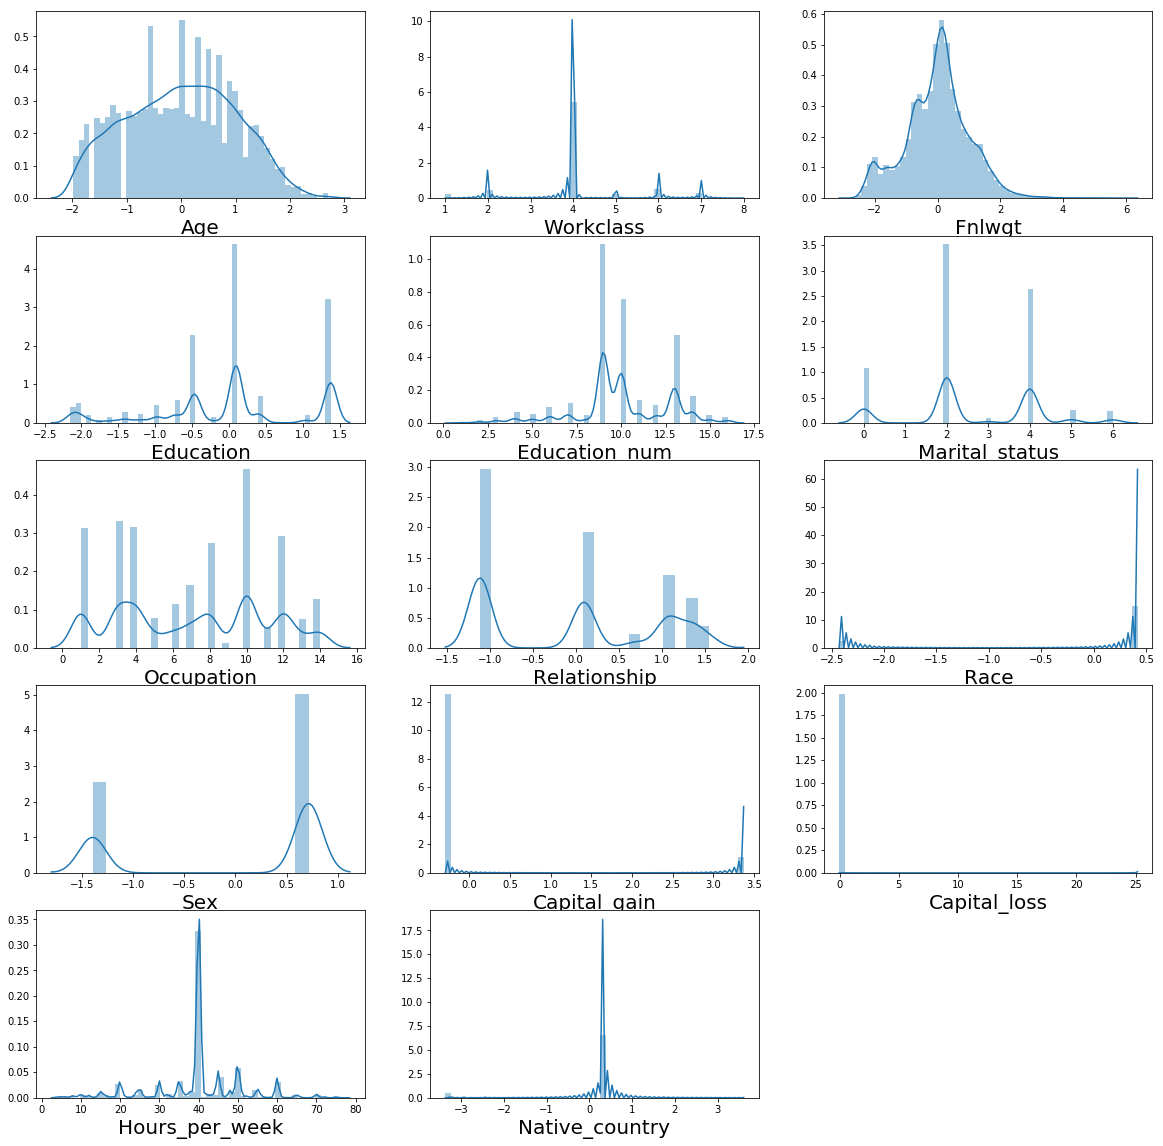

In [64]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in df:
    if plotno<=14:
        ax=plt.subplot(5,3,plotno)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

Now data seems to be more normalized then previous.

In [65]:
df.shape

(30439, 15)

#### Data Loss

In [66]:
print(f"loss of data is:{round(((32560-30439)/32560)*100,2)}%")

loss of data is:6.51%


## `Model Deployment`

In [67]:
X=df.drop(['Income'],axis=1)
Y=df.Income

splitting data into fetures & labels.

In [68]:
## Standarized Our featuires

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

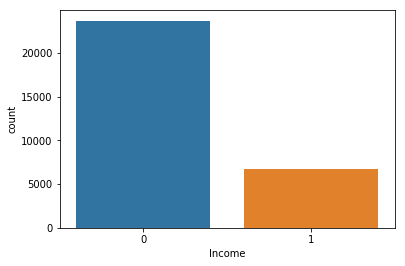

In [69]:
sns.countplot(Y)

data is not balanced.

### Balancing Dataset

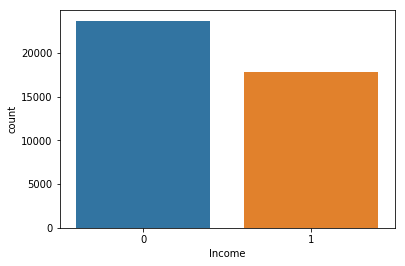

In [70]:
over_sampling=SMOTE(0.75)
X,Y=over_sampling.fit_resample(X_scaled,Y)

sns.countplot(Y)

Now data is balanced.

In [71]:
X.shape

(41466, 14)

No. of records are incresed.

In [72]:
Linear=LogisticRegression()
RandomForest=RandomForestClassifier()
AdaBoost=AdaBoostClassifier()
bagging=BaggingClassifier()

In [74]:
algo=[Linear,RandomForest,bagging,AdaBoost]
model_acc_rs={}
maximum_acc=[]
for model in algo:
    max_accuracy=0
    for i in range(85,100,2):
        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        accuracy=accuracy_score(Y_test,Y_pred)*100
        if accuracy>max_accuracy:
            max_accuracy=accuracy
            rs=i
    maximum_acc.append(max_accuracy)
    model_acc_rs[model]=[max_accuracy,rs]
    print(f"{model}:\n---------------------------\n---------------------------\n")
    print(f"The highest accuracy is {max_accuracy} of model {model} at random state {rs}")


    print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

    print(f"\n\n\n Classification report for the model:\n",classification_report(Y_test,Y_pred))
    

LogisticRegression():
---------------------------
---------------------------

The highest accuracy is 78.18905232698337 of model LogisticRegression() at random state 87


Confusion Matrix:

 [[3827  958]
 [ 961 2548]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      4785
           1       0.73      0.73      0.73      3509

    accuracy                           0.77      8294
   macro avg       0.76      0.76      0.76      8294
weighted avg       0.77      0.77      0.77      8294

RandomForestClassifier():
---------------------------
---------------------------

The highest accuracy is 89.13672534362189 of model RandomForestClassifier() at random state 91


Confusion Matrix:

 [[4285  500]
 [ 440 3069]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      4785
           1       0.86      0.87 

In [75]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(20,24):
        cvS=cross_val_score(model,X,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()
    



LogisticRegression()
-------------------------


Mean CV Score of model LogisticRegression():: 0.7777704434244577 at k-fold::20

Mean CV Score of model LogisticRegression():: 0.7778425010366836 at k-fold::21

Mean CV Score of model LogisticRegression():: 0.7780355251308471 at k-fold::22

Mean CV Score of model LogisticRegression():: 0.7777699046897795 at k-fold::23


RandomForestClassifier()
-------------------------


Mean CV Score of model RandomForestClassifier():: 0.8919444960020021 at k-fold::20

Mean CV Score of model RandomForestClassifier():: 0.8924024860864538 at k-fold::21

Mean CV Score of model RandomForestClassifier():: 0.8921802628150093 at k-fold::22

Mean CV Score of model RandomForestClassifier():: 0.8910940092473499 at k-fold::23


BaggingClassifier()
-------------------------


Mean CV Score of model BaggingClassifier():: 0.8766552418220023 at k-fold::20

Mean CV Score of model BaggingClassifier():: 0.8773305045152993 at k-fold::21

Mean CV Score of model BaggingCla

In [76]:
print(f"Maximun CV score of each model\n::{CVmodel}")

Maximun CV score of each model
::{'LogisticRegression()': [0.7780355251308471], 'RandomForestClassifier()': [0.8924024860864538], 'BaggingClassifier()': [0.8773305045152993], 'AdaBoostClassifier()': [0.8434149312141845]}


In [77]:
m=list(CVmodel.keys())
print("The least difference between the accuracy and CV score of each model is::\n")
for i in range(4):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-maximum_acc[i]),2)}")

The least difference between the accuracy and CV score of each model is::

LogisticRegression()::0.39
RandomForestClassifier()::0.1
BaggingClassifier()::0.04
AdaBoostClassifier()::0.27


here for model BaggingClassifier we get the least value i.e. the difference between the accuracy and cvScore of this model is 0.04.

In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=87)

here we split the dataset in training and testing dataset at RandomState 87.

### Plotting ROC Curve

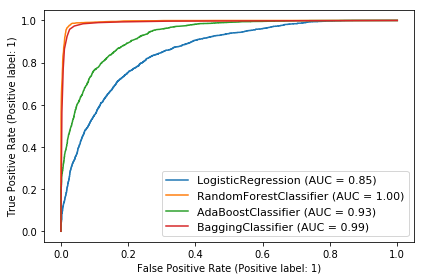

In [80]:
dis=plot_roc_curve(Linear,X_test,Y_test)
plot_roc_curve(RandomForest,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(AdaBoost,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(bagging,X_test,Y_test,ax=dis.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.tight_layout()

## Hyperparameter Tuning

In [83]:
clf=BaggingClassifier()
knn=KNeighborsClassifier()

param={
    "base_estimator":[RandomForest,knn],
    "n_estimators":[19,21],
    "max_samples":[1.0,1.1],
    "bootstrap":[True,False],
    "oob_score":[False,True]
}
grd=GridSearchCV(clf,param_grid=param)
grd.fit(X_train,Y_train)
print("Best Pramaeters:",grd.best_params_)

clf=grd.best_estimator_   #reinstantiating the best parameter to algo

clf.fit(X_train,Y_train)
ypred=clf.predict(X_test)

print("Confusion Matrix::\n",confusion_matrix(Y_test,ypred))

print("Accuracy::",accuracy_score(Y_test,ypred))

print("Classification Report::\n",classification_report(Y_test,ypred))

Best Pramaeters: {'base_estimator': RandomForestClassifier(), 'bootstrap': False, 'max_samples': 1.0, 'n_estimators': 21, 'oob_score': False}
Confusion Matrix::
 [[4288  501]
 [ 415 3090]]
Accuracy:: 0.8895587171449241
Classification Report::
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      4789
           1       0.86      0.88      0.87      3505

    accuracy                           0.89      8294
   macro avg       0.89      0.89      0.89      8294
weighted avg       0.89      0.89      0.89      8294



there is increased in accuracy after tuning.

In [84]:
print("\n\nPredicted values:\n",Y_pred)

print("\n\nThe dataframe for the actual & predicted values:\n\n",pd.DataFrame({"Actual data":Y_test,"Predicted":Y_pred}))




Predicted values:
 [0 1 1 ... 0 0 0]


The dataframe for the actual & predicted values:

        Actual data  Predicted
9040             0          0
13168            0          1
24329            0          1
2472             0          0
16251            0          0
7084             0          1
32663            1          1
36282            1          1
11813            0          0
26979            0          1
29954            0          1
33709            1          0
23694            0          0
10042            0          1
12288            0          0
10797            0          0
19608            0          1
7106             0          0
21066            0          1
12267            0          1
28854            0          1
14863            1          1
41070            1          1
23446            0          1
2196             0          0
29063            0          1
39541            1          1
9509             0          1
7239             0          0
18983   

## Saving model

In [85]:
import pickle
pickle.dump(clf,open("Income_prediction.pickle","wb"))